# Fundamentals of Financial Time Series - Exercises


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm, t


### Exercise: Functions

1. Load a time series of your choice and prepare them appropriately. You may download new data from
yahoo finance or use the existing files (BMW.csv, AMZN.csv or GDAX.csv). Wrap the procedure
in a function.

In [2]:
def set_up(csv_name: str, col_name: str):
    """
    Load a csv file, set index, computes return and log returns
    :param csv_name: name of the csv-file, here: path name
    :param col_name: name of the column from yahoo finance, Open, Close, etc.
    :return: two dataframes, simple and log returns
    """
    df = pd.read_csv(csv_name)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df_price = df[col_name]
    df_returns = df_price.pct_change().dropna()
    df_logreturns = np.log(df_price).diff(1)
    return df_returns, df_logreturns

return_daily, log_return_daily = set_up('GDAX.csv', 'Adj Close')

### Exercise: Comparison net return vs. log-returns

1. Show that the difference between log and net returns are minimal. Compute their difference and
visualize it in a plot.

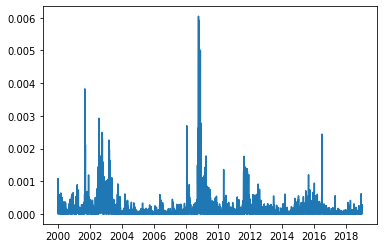

In [3]:
diff_ret_daily = return_daily-log_return_daily

plt.plot(diff_ret_daily)
plt.show()


2. Until now, we were using daily returns. Do the previous exercise with weekly,
monthly and yearly returns. Check out the .resample() and .agg() method of a dataframe. Note that
aggregation over time is different between net and log returns!

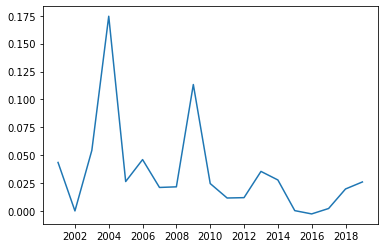

In [4]:
freq = 'Y'

# Aggregation over time with log returns is straight forward
log_return_weekly = log_return_daily.resample(freq).agg(np.sum)

# compute gross returns first and aggregate by product
return_gross_daily = pd.Series(return_daily + 1, name='gross')
return_weekly = return_gross_daily.resample(freq).agg(np.product) - 1

# Compute difference
diff_ret_weekly = return_weekly-log_return_weekly

plt.plot(diff_ret_weekly)
plt.show()

In [5]:
return_gross_daily

Date
2000-01-04    0.975735
2000-01-05    0.987114
2000-01-06    0.995824
2000-01-07    1.047265
2000-01-10    1.021319
                ...   
2018-12-19    1.002357
2018-12-20    0.985593
2018-12-21    1.002141
2018-12-27    0.976273
2018-12-28    1.017093
Name: gross, Length: 4864, dtype: float64

### Exercise: Mini Project

Visit yahoo finance and download the time series of a stock. You may choose freely.
Conduct the same analysis we did in the lecture. Plot the time series and compare the difference
of open, close, adjusted close, etc.. Next, show that the stylized facts still hold.

### References

[A] A nice blog with many common obstacles in finance
https://tcoil.info/aggregate-daily-ohlc-stock-price-data-to-weekly-python-and-pandas/